# Cargando datos del boston housing price.

In [1]:
import pandas as pd
import numpy as np
path_b_housing = "D:/No tocar/Lic. Ciencias de la Computacion/Cuarto Semestre/Practica Laboral IA/BostonHousing.csv"
housing = pd.read_csv(path_b_housing)
housing.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Analisis exploratorio de los datos.

In [2]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Visualizacion  


Relacion existente entre las caracteristicas mediante la matriz de puntos

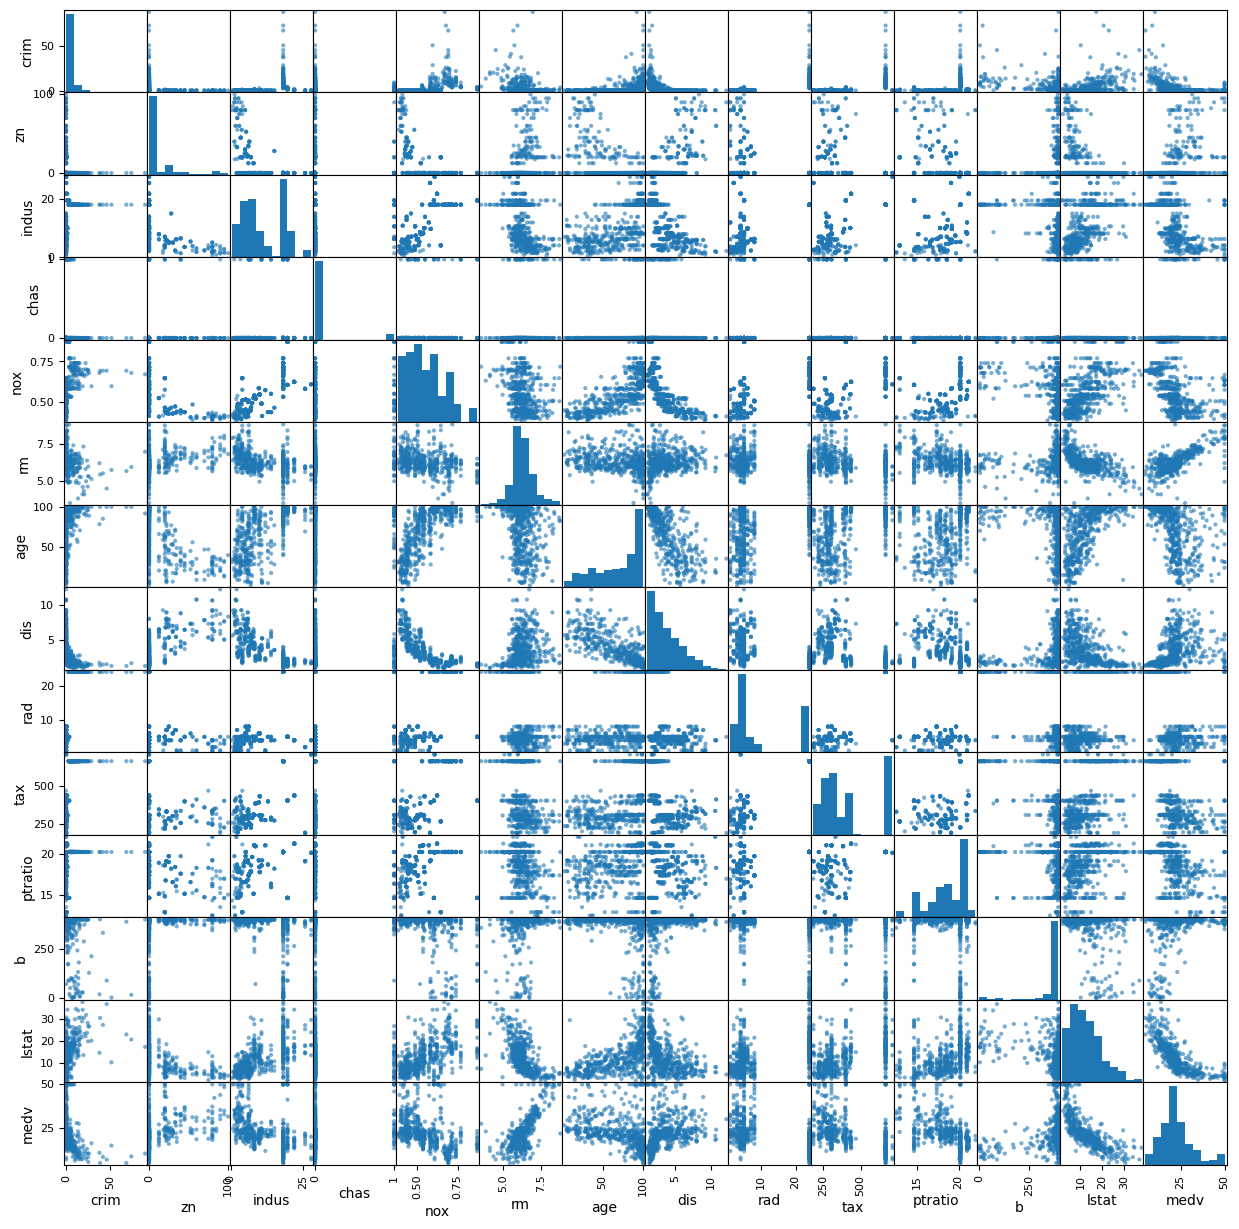

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(housing.iloc[:,:],figsize=(15,15),alpha=0.6)
plt.show()

Revisando el coeficiente de relación existente entre las características y en especial con el valor objetivo(***medv***)

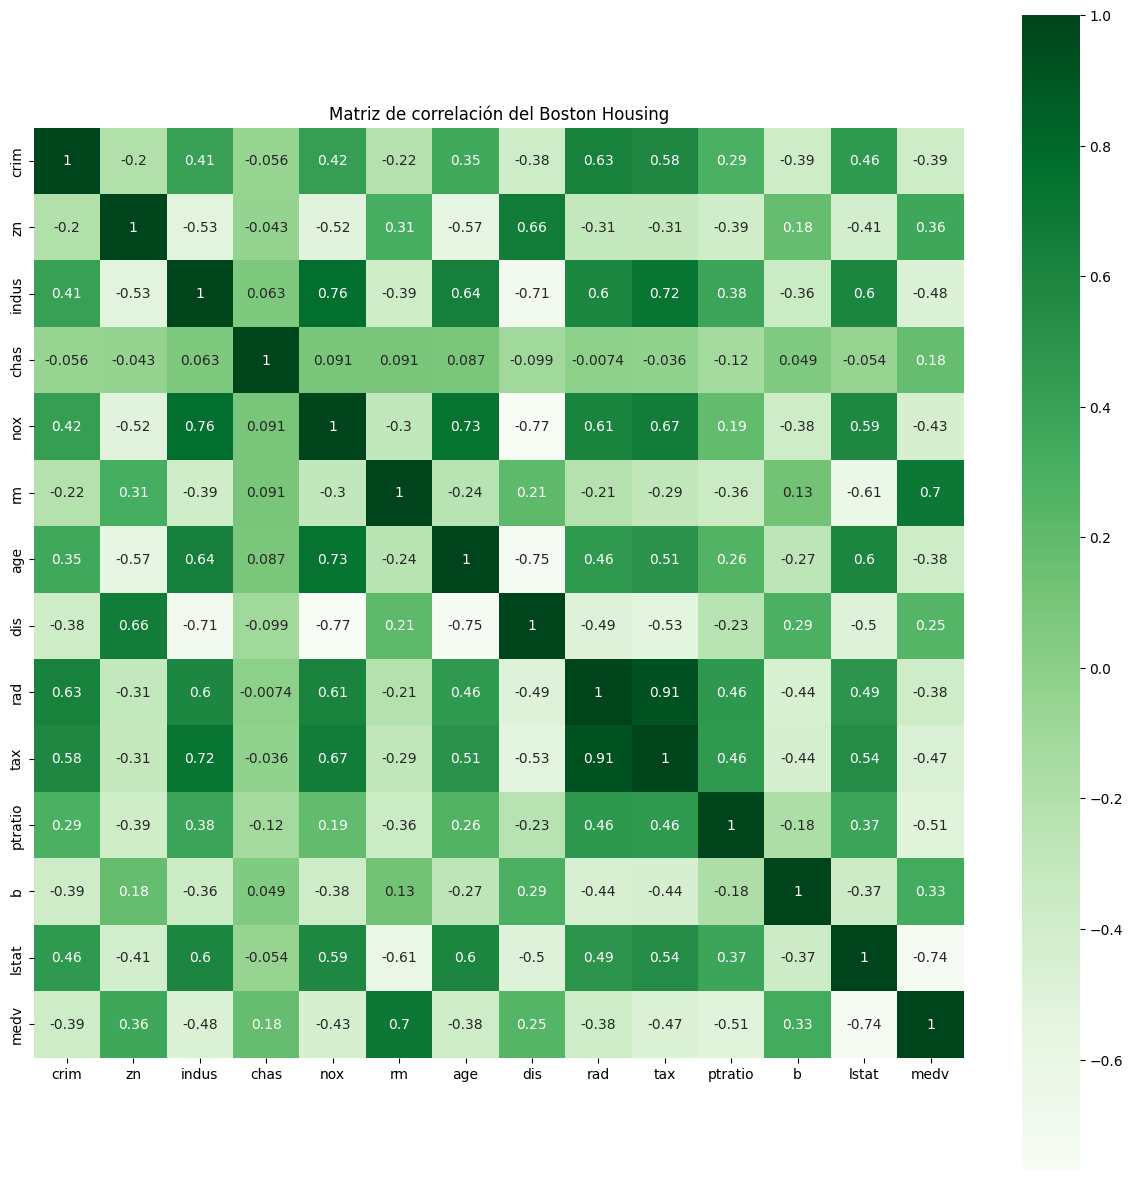

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(housing.corr(),square=True,annot=True, cmap='Greens')
plt.title('Matriz de correlación del Boston Housing')
plt.show()

# Dividiendo el conjunto de datos

In [7]:
X = housing.drop(['medv'], axis = 1)
Y = housing['medv']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

# Implementacion de los modelos Linear Regression y Random Forest Regressor

## Linear Regression

In [9]:
##  1-Importando la libreria del modelo.
#   2-Creando el modelo.
#   2-Entrenando el modelo.

from sklearn.linear_model import LinearRegression

ln_rg = LinearRegression()
 
ln_rg.fit(X_train, Y_train)

LinearRegression()

### Entrenando el modelo con validación cruzada

In [10]:
##  1-Importando cross_val_predict
#   2-Realizando predicciones sobre el conjunto de entrenamiento y validación.
from sklearn.model_selection import cross_val_predict
y_ln_pred = cross_val_predict(ln_rg,X_train,Y_train,cv = 5)

In [26]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_train, y_ln_pred))#Media de los errores absolutos
print('MSE:',metrics.mean_squared_error(Y_train, y_ln_pred))#Media de los errores cuadraticos
print('RMSE:',metrics.root_mean_squared_error(Y_train, y_ln_pred))#Raiz cuadrada de la media de los errores cuadraticos

MAE: 3.570884642894648
MSE: 25.981091903860495
RMSE: 5.09716508501152


## Ramdon Forest Regresor

In [12]:
##  1-Importando la libreria del modelo.
#   2-Creando el modelo.
#   2-Entrenando el modelo.

from sklearn.ensemble import RandomForestRegressor

rnf_rg = RandomForestRegressor()

rnf_rg.fit(X_train, Y_train)

RandomForestRegressor()

### Entrenando el modelo con validacion cruzada

In [13]:
##   1-Realizando predicciones sobre el conjunto de entrenamiento y validación.
y_rnf_pred = cross_val_predict(rnf_rg,X_train,Y_train,cv = 5)

In [14]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_train, y_rnf_pred))#Media de los errores absolutos
print('MSE:',metrics.mean_squared_error(Y_train, y_rnf_pred))#Media de los errores cuadráticos
print('RMSE:',metrics.root_mean_squared_error(Y_train, y_rnf_pred))#Raiz de la media de los errores cuadráticos

MAE: 2.505242937853107
MSE: 14.549101316384178
RMSE: 3.814328422721905


## Support Vector Machines

### Escalar los datos de entrenamiento y prueba

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [16]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train,Y_train)

SVR(kernel='linear')

### Entrenando el modelo con validacion cruzada

In [17]:
y_svr_pred = cross_val_predict(svr,X_train,Y_train,cv = 5)

print('MAE:',metrics.mean_absolute_error(Y_train, y_svr_pred))#Media de los errores absolutos
print('MSE:',metrics.mean_squared_error(Y_train, y_svr_pred))#Media de los errores cuadráticos
print('RMSE:',metrics.root_mean_squared_error(Y_train, y_svr_pred))#Raiz de la media de los errores cuadráticos

MAE: 3.3978189781669874
MSE: 28.368124429801536
RMSE: 5.326173526069305


# Evaluando los modelos en el conjunto de prueba

## Linear Regression

In [18]:
y_ln_test_pred = cross_val_predict(ln_rg,X_test,Y_test,cv = 5)

print('MAE:',metrics.mean_absolute_error(Y_test, y_ln_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_ln_test_pred))
print('RMSE:',metrics.root_mean_squared_error(Y_test, y_ln_test_pred))

MAE: 3.61754500531663
MSE: 30.30789857758185
RMSE: 5.505260990868812


## Ramdon Forest Regressor

In [19]:
y_rn_test_pred = cross_val_predict(rnf_rg,X_test,Y_test,cv = 5)

print('MAE:',metrics.mean_absolute_error(Y_test, y_rn_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_rn_test_pred))
print('RMSE:',metrics.root_mean_squared_error(Y_test, y_rn_test_pred))

MAE: 2.3884144736842106
MSE: 16.721272414473685
RMSE: 4.089165246657768


## Support Vector Machines

In [21]:
y_svr_test_pred = cross_val_predict(svr,X_test,Y_test,cv = 5)

print('MAE:',metrics.mean_absolute_error(Y_test, y_svr_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_svr_test_pred))
print('RMSE:',metrics.root_mean_squared_error(Y_test, y_svr_test_pred))

MAE: 3.1841615431930954
MSE: 25.40834578958504
RMSE: 5.04066918073236


In [27]:
df_res = pd.DataFrame({'Algoritmo':['Linear Regression', 'Ramdon Forest Regressor','Support Vector Machines'],
                       'RMSE Train': [metrics.root_mean_squared_error(Y_train, y_ln_pred),
                                      metrics.root_mean_squared_error(Y_train, y_rnf_pred),
                                      metrics.root_mean_squared_error(Y_train, y_svr_pred)],
                       'RMSE Test': [ metrics.root_mean_squared_error(Y_test, y_ln_test_pred),
                                      metrics.root_mean_squared_error(Y_test, y_rn_test_pred),
                                      metrics.root_mean_squared_error(Y_test, y_svr_test_pred)]})
df_res

,Algoritmo,RMSE Train,RMSE Test
0,Linear Regression,5.097165,5.505261
1,Ramdon Forest Regressor,3.814328,4.089165
2,Support Vector Machines,5.326174,5.040669
